In [14]:
import pandas as pd
import numpy as np
# import clustering
from sklearn.cluster import KMeans,DBSCAN, MeanShift, SpectralClustering,AffinityPropagation, Birch,MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# t-SNE visualization
from sklearn.manifold import TSNE

# imputation
from sklearn.impute import KNNImputer

# Scaling
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt



In [10]:


# import dataset 
data = pd.read_csv('CC GENERAL.csv',delimiter=',')

data.head()



# import cluste

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
data.isna().sum()
# drop the CUST_ID column
data.drop('CUST_ID',axis=1,inplace=True)

C:\Users\enzoh\AppData\Local\Temp\ipykernel_20044\3239180250.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\enzoh\AppData\Local\Temp\ipykernel_20044\3239180250.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\enzoh\AppData\Local\Temp\ipykernel_2004

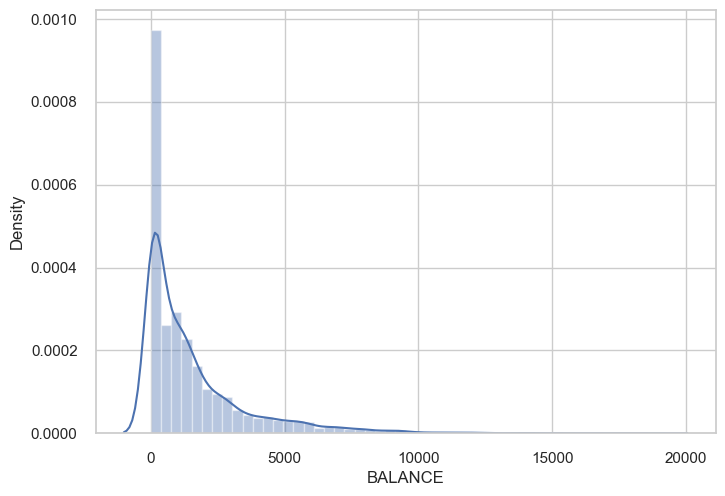

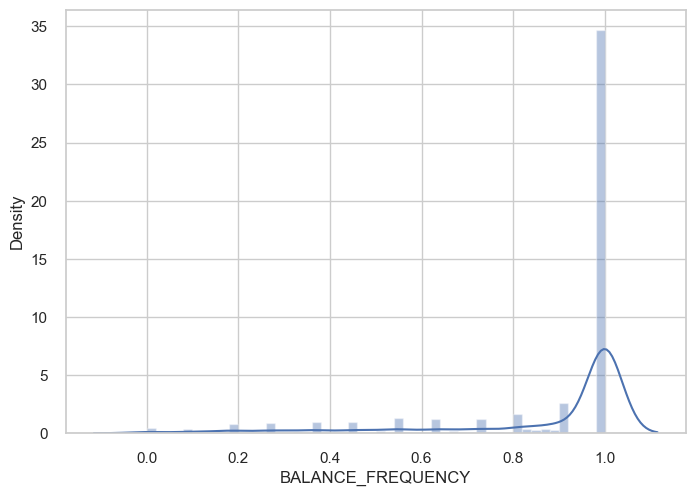

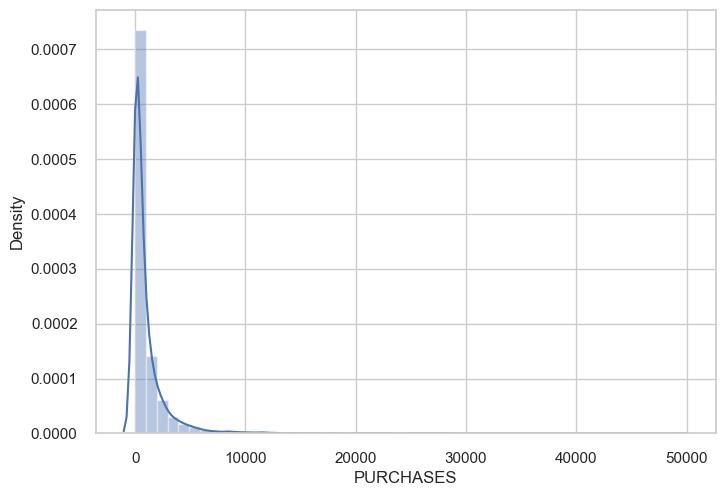

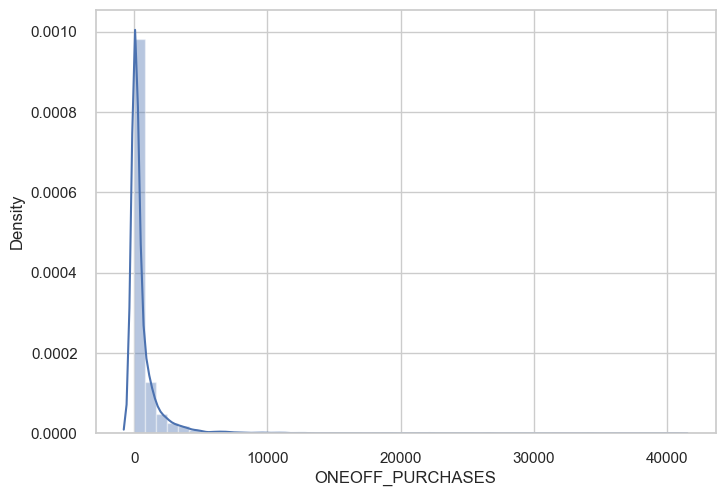

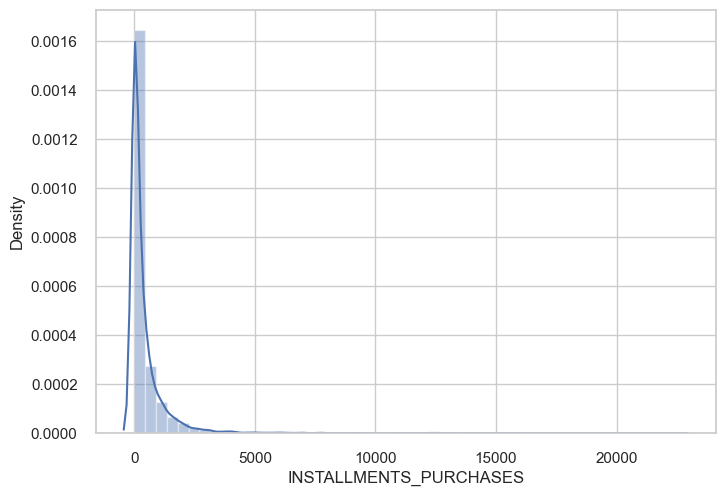

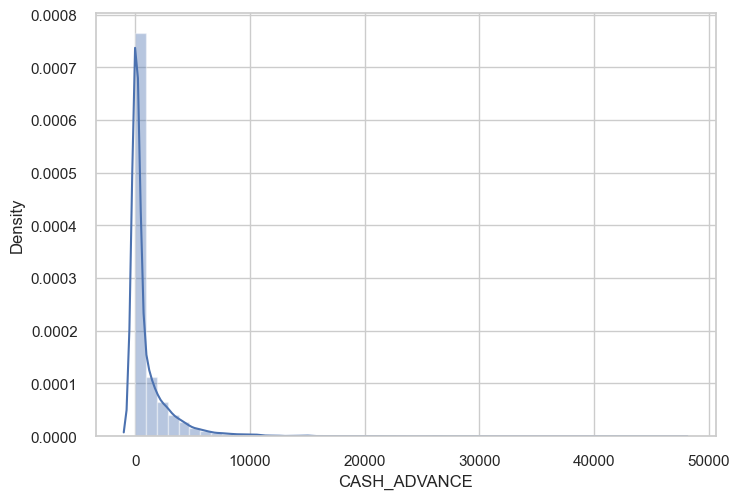

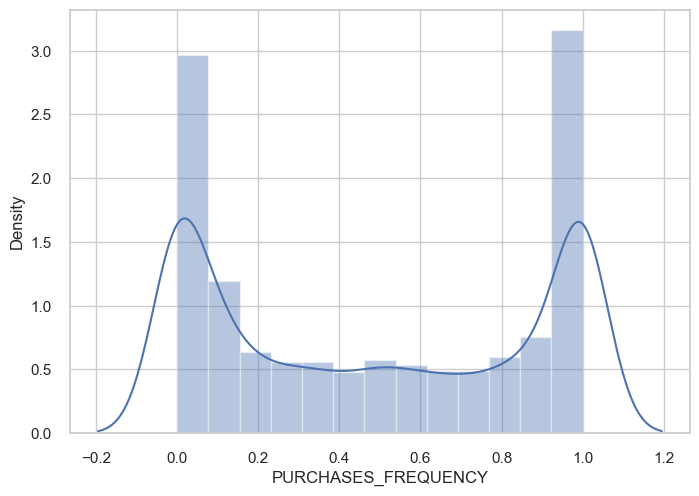

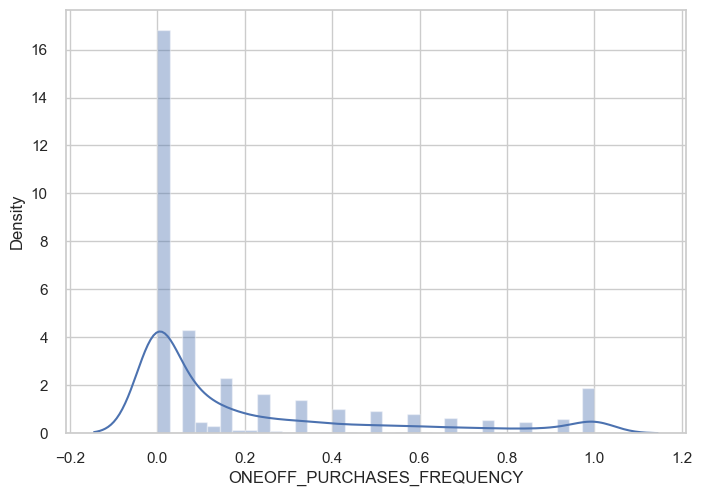

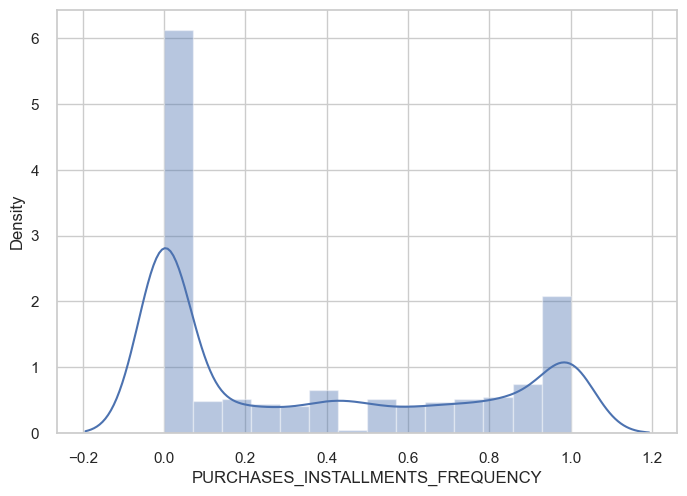

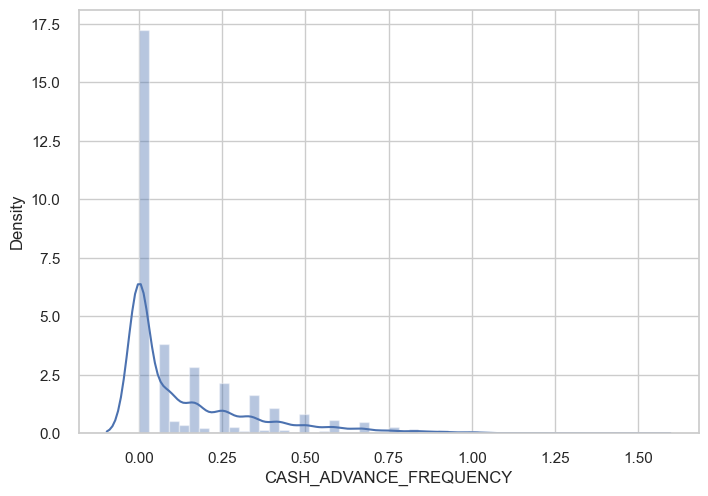

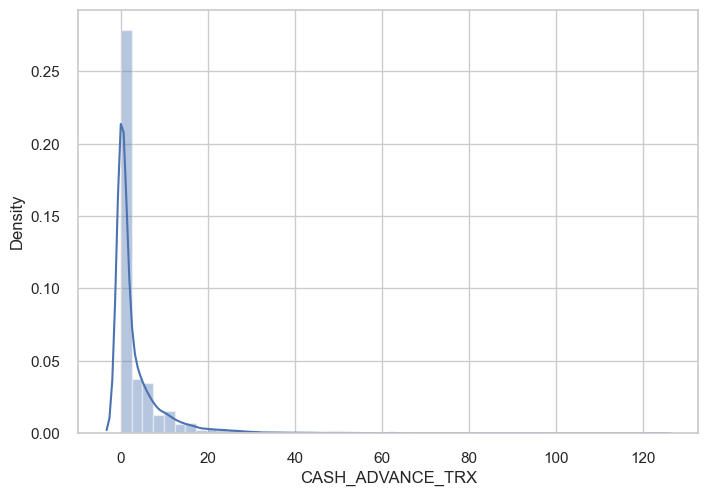

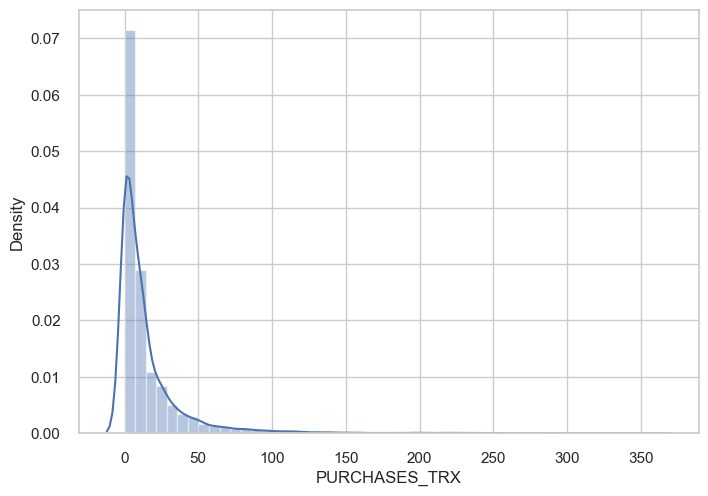

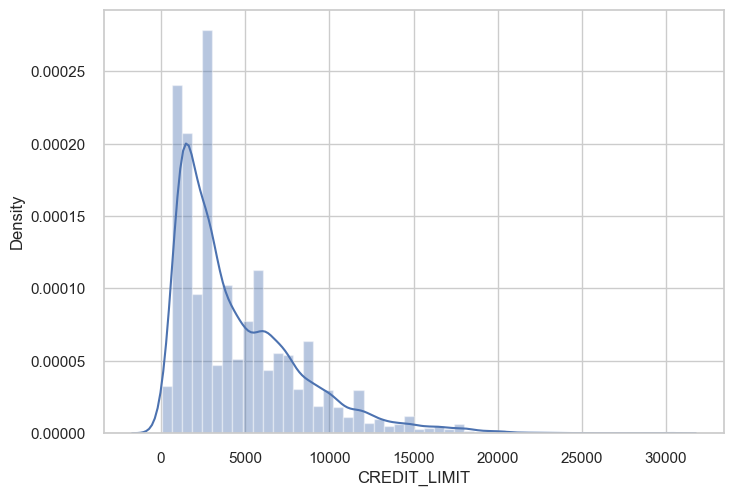

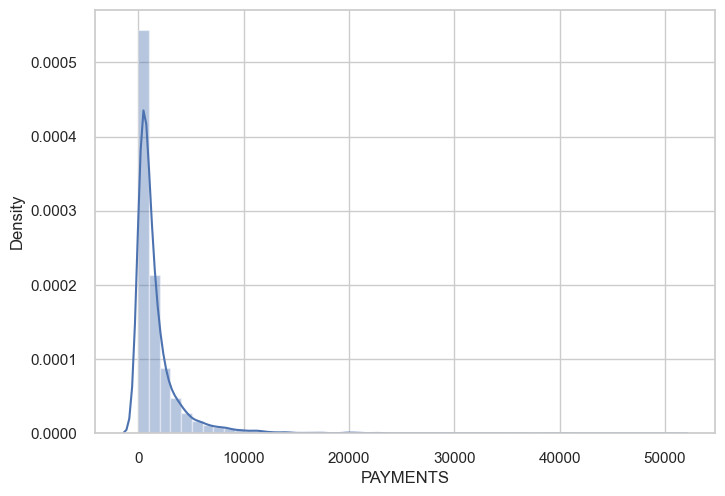

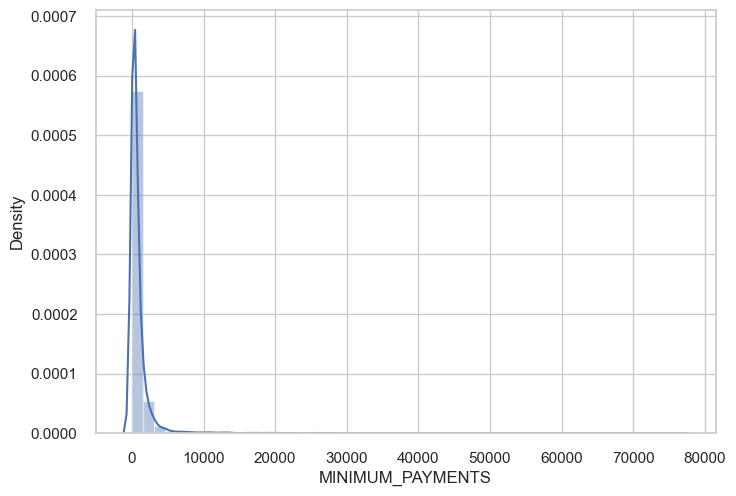

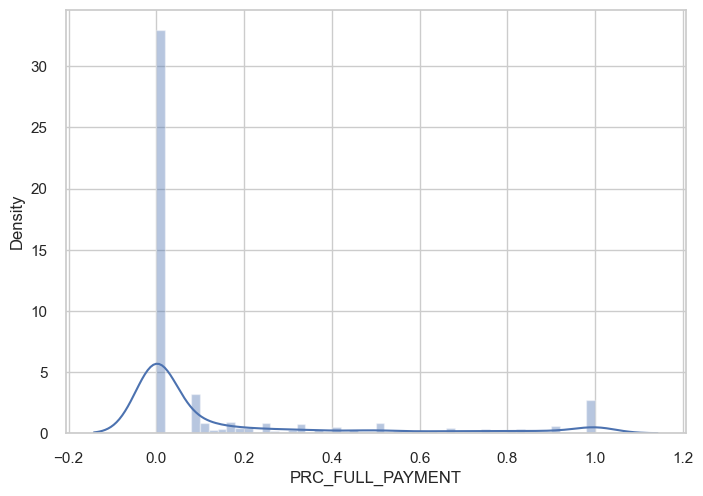

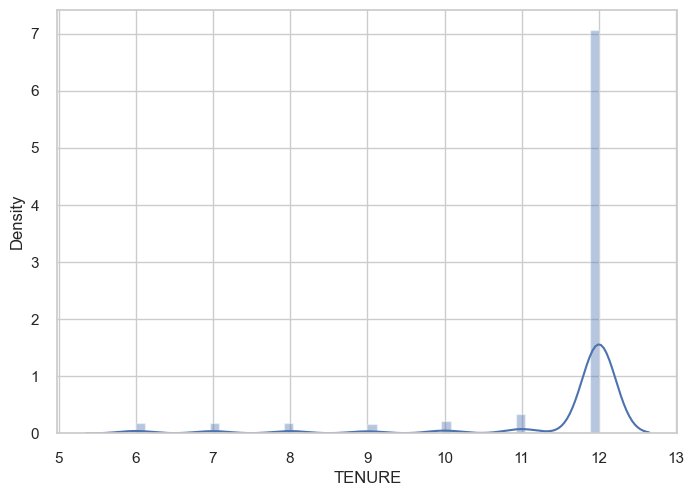

In [17]:
# visualize repartition of data for each feature
for col in data.columns:
    plt.figure()
    sns.distplot(data[col])



In [20]:
# handle missing values
# impute missing values with KNNImputer
imputer = KNNImputer()
data = pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

# normalize data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data.head(5)
data.describe()








,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000
mean,-2.540488e-17,4.445854e-17,3.175610e-18,0.000000,1.587805e-18,-6.351220e-18,5.200061e-17,1.905366e-17,-9.526830e-18,-2.381707e-18,-1.111463e-17,-9.526830e-18,3.810732e-17,-3.175610e-17,4.763415e-18,-9.526830e-18,0.000000
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-0.356934,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221432e+00,-5.986883e-01,-3.632325e-01,-5.255510e-01,-4.122768
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-0.356934,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.954324e-01,-4.662913e-01,-2.923955e-01,-5.255510e-01,0.360680
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-0.334040,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.106583e-01,-3.026846e-01,-2.350392e-01,-5.255510e-01,0.360680
75%,2.352559e-01,5.180838e-01,5.004652e-02,-0.009057,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512769e-01,5.802976e-02,-2.057546e-02,-3.712234e-02,0.360680
max,8.397489e+00,5.180838e-01,2.248351e+01,24.201066,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.009985e+00,1.692228e+01,3.218433e+01,2.893453e+00,0.360680


In [25]:
# pca to reduce dimensionality to keep 80% of variance
pca = PCA(n_components=0.8)
pca.fit(data)
# keep columns names
columns = data.columns
print(columns)
data = pd.DataFrame(pca.transform(data))
data.head(5)
data.describe()



RangeIndex(start=0, stop=5, step=1)


,0,1,2
count,8.950000e+03,8.950000e+03,8.950000e+03
mean,-1.016195e-16,-2.667512e-16,6.232135e-17
std,2.154277e+00,1.858684e+00,1.224785e+00
min,-2.788451e+00,-2.681361e+00,-1.004811e+01
25%,-1.484503e+00,-1.265096e+00,-7.686096e-01
50%,-4.556850e-01,-4.855646e-01,4.781642e-02
75%,7.623361e-01,7.384884e-01,5.600119e-01
max,2.960304e+01,2.536003e+01,1.689312e+01
